In [4]:
"""
Mounting to Drive
"""

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:
import sys, unicodedata
#!{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 
                   'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 
                   'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
"""
Contractions Dictionary
"""

def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

In [6]:
"""
Reading Data
"""

import pandas as pd 
raw_dataset = pd.read_csv('drive/My Drive/twcs.csv')

In [7]:
"""
Data Set
"""

raw_dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [8]:
"""
Inbound and Outbound
"""

inbound_data = list(raw_dataset[raw_dataset['inbound'] == True]['text'])
outbound_data = list(raw_dataset[raw_dataset['inbound'] == False]['text'])

In [9]:
"""
Raw Metrics
"""

print ('Shape of Data" {}'.format(raw_dataset.shape))

print ('Inbound Data Length: {}'.format(len(inbound_data)))
print ('Outbound Data Length: {}'.format(len(outbound_data)))

authors = set(raw_dataset['author_id'])
print ("Distinct Authors: {}".format(len(authors)))

Shape of Data" (2811774, 7)
Inbound Data Length: 1537843
Outbound Data Length: 1273931
Distinct Authors: 702777


In [12]:
"""
Sample Data
"""

tweets = inbound_data + outbound_data

sample_data = True
if sample_data:
  tweets = tweets[0:100000]

In [13]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub(r"http\S+", "", sent) # remove urls
        sent = re.sub(r"@\S+", "", sent) # remove references
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

data_words = list(sent_to_words(tweets))

In [15]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [24]:
"""
Additional Cleaning Steps
"""

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_small_words(words):
    """Remove words with length less than 4 alphabets"""
    new_words = []
    for word in words:
      if len(word) < 3:
        pass
      else:
        new_words.append(word)
    return new_words

contractions_dict = load_dict_contractions()
def remove_contractions(words):
    """Remove contractions"""
    new_words = []
    for word in words:
        word = word.replace("’","'")
        if word in contractions_dict.keys():
            word = contractions_dict[word]
        else:
            pass
        new_words.append(word)
    return new_words     

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


In [28]:
def normalize_text(tokenized_text):

  final_doc = [] 
  def normalizing(text):
      tokenized_text = remove_small_words(text)
      tokenized_text = remove_non_ascii(tokenized_text)
      tokenized_text = to_lowercase(tokenized_text)
      tokenized_text = remove_punctuation(tokenized_text)
      tokenized_text = remove_contractions(tokenized_text)

      return tokenized_text
      
  for text in tokenized_text:
      normalized_text = normalizing(text)
      final_doc.append(normalized_text)

  return final_doc    

final_doc = normalize_text(data_ready)  

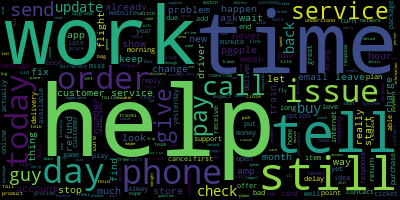

In [34]:
"""
Word Cloud - Numbers to Text
"""

from wordcloud import WordCloud

text_string = []
for text in final_doc:
  text_string.append(' '.join(text))

long_string = ','.join(text_string)  

wordcloud = WordCloud(background_color="black", 
                      max_words=5000, 
                      contour_width=3, 
                      contour_color='steelblue')
wordcloud.generate(long_string)

wordcloud.to_image()

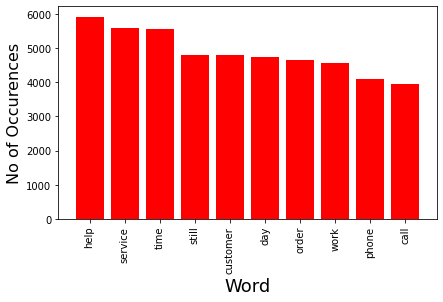

In [35]:
"""
Most Frequent Words
"""

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

freq_words = get_top_n_words(text_string, 10)

word = []
frequency = []
for i in range(len(freq_words)):
  word.append(freq_words[i][0])
  frequency.append(freq_words[i][1])

indices = np.arange(len(freq_words))
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.xlabel('Word', fontsize=18)
plt.ylabel('No of Occurences', fontsize=16)
plt.show()

In [39]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Filter Extremes
id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# TFIDF
tfidf = gensim.models.TfidfModel(corpus)
corpus = tfidf[corpus]

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=4, 
                                       chunksize=10,
                                       passes=10,
                                       workers=2, 
                                       alpha='symmetric',
                                       iterations=100,
                                       per_word_topics=True)

lda_model.save('trained_lda.model')

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:804: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [40]:
"""
Topics
"""
print(lda_model.print_topics(num_topics=15, num_words=5))

[(0, '0.027*"send" + 0.024*"issue" + 0.020*"problem" + 0.017*"happen" + 0.017*"guy"'), (1, '0.028*"order" + 0.021*"call" + 0.018*"check" + 0.016*"time" + 0.016*"new"'), (2, '0.026*"update" + 0.025*"phone" + 0.024*"work" + 0.017*"wait" + 0.017*"service"'), (3, '0.035*"help" + 0.021*"account" + 0.020*"fix" + 0.017*"today" + 0.016*"show"')]


In [41]:
"""
Dominant Topics
"""

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, 
                                                  corpus=corpus, 
                                                  texts=final_doc)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.2500,"send, issue, problem, happen, guy, really, kee...",[propose]
1,1,0.0,0.6367,"send, issue, problem, happen, guy, really, kee...","[send, several, private, message, respond, usual]"
2,2,0.0,0.2500,"send, issue, problem, happen, guy, really, kee...",[]
3,3,2.0,0.7216,"update, phone, work, wait, service, still, bac...","[bad, customer, service]"
4,4,3.0,0.7523,"help, account, fix, today, show, support, alre...","[magically, change, connectivity, whole, family]"
5,5,2.0,0.6742,"update, phone, work, wait, service, still, bac...","[sign, day]"
6,6,1.0,0.6239,"order, call, check, time, new, day, flight, ch...","[lie, great, connection, bar, lte, still, load..."
7,7,3.0,0.4772,"help, account, fix, today, show, support, alre...","[whenever, contact, customer, support, tell, s..."
8,8,2.0,0.5170,"update, phone, work, wait, service, still, bac...","[email, copy, spectrum, update, training]"
9,9,3.0,0.5463,"help, account, fix, today, show, support, alre...","[receive, corporate, office, copy]"
